# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns))


# Display the first few rows and data info
print(fires_dt.head())
print(fires_dt.info())





  coord_x coord_y  month  day  ffmc   dmc     dc  isi  temp  rh  wind  rain  \
0       X       Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain   
1       7       5    mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7     0   
2       7       4    oct  tue  90.6  35.4  669.1  6.7    18  33   0.9     0   
3       7       4    oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3     0   
4       8       6    mar  fri  91.7  33.3   77.5    9   8.3  97     4   0.2   

   area  
0  area  
1     0  
2     0  
3     0  
4     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   coord_x  518 non-null    object
 1   coord_y  518 non-null    object
 2   month    518 non-null    object
 3   day      518 non-null    object
 4   ffmc     518 non-null    object
 5   dmc      518 non-null    object
 6   dc       518 non-null    object
 7   isi      518 non-null 

# Get X and Y

Create the features data frame and target data.

In [5]:
from sklearn.model_selection import train_test_split

X = fires_dt.drop(columns='area')
y = fires_dt['area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the numeric and categorical features
numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Preproc1: Scaling and one-hot encoding
preproc1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [7]:
# Preproc2: Scaling, non-linear transformation, and one-hot encoding
preproc2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('transformer', PowerTransformer(method='yeo-johnson'))
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

baseline_model = LinearRegression()
advanced_model = RandomForestRegressor(random_state=42)

pipeline_a = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', baseline_model)
])

pipeline_b = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', baseline_model)
])

pipeline_c = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', advanced_model)
])

pipeline_d = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', advanced_model)
])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [9]:
# Define performance metrics for regression
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid_baseline = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

param_grid_advanced = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 5, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Function to perform grid search
def grid_search_pipeline(pipeline, param_grid, X_train, y_train, scoring):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

# Perform grid search for each pipeline
grid_search_a = grid_search_pipeline(pipeline_a, param_grid_baseline, X_train, y_train, scoring)
grid_search_b = grid_search_pipeline(pipeline_b, param_grid_baseline, X_train, y_train, scoring)
grid_search_c = grid_search_pipeline(pipeline_c, param_grid_advanced, X_train, y_train, scoring)
grid_search_d = grid_search_pipeline(pipeline_d, param_grid_advanced, X_train, y_train, scoring)

# Display the best parameters and scores for each pipeline
best_params_scores = {
    'Pipeline A': (grid_search_a.best_params_, grid_search_a.best_score_),
    'Pipeline B': (grid_search_b.best_params_, grid_search_b.best_score_),
    'Pipeline C': (grid_search_c.best_params_, grid_search_c.best_score_),
    'Pipeline D': (grid_search_d.best_params_, grid_search_d.best_score_)
}

print(best_params_scores)

{'Pipeline A': ({'regressor__fit_intercept': False, 'regressor__positive': True}, -2170.804682021351), 'Pipeline B': ({'regressor__fit_intercept': True, 'regressor__positive': False}, -2162.0465924854166), 'Pipeline C': ({'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 50}, -2253.4778458325113), 'Pipeline D': ({'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 50}, -2252.736302587947)}


# Evaluate

+ Which model has the best performance?

Pipeline A: -2170.804682021351
Pipeline B: -2162.0465924854166
Pipeline C: -2253.4778458325113
Pipeline D: -2252.736302587947


Based on the negative mean squared error (MSE) scores, the model with the best performance is Pipeline B, which has a score of approximately -2162.046. Negative MSE scores are typical in scikit-learn's GridSearchCV when using refit='neg_mean_squared_error', where a lower score indicates better performance.

Therefore, Pipeline B, which likely corresponds to preproc2 with a baseline regressor (LinearRegression), has the best performance among the pipelines.

# Export

+ Save the best performing model to a pickle file.


In [16]:
import joblib

pipeline_b.fit(X_train, y_train)

joblib.dump(pipeline_b, 'best_model.pkl')

['best_model.pkl']

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

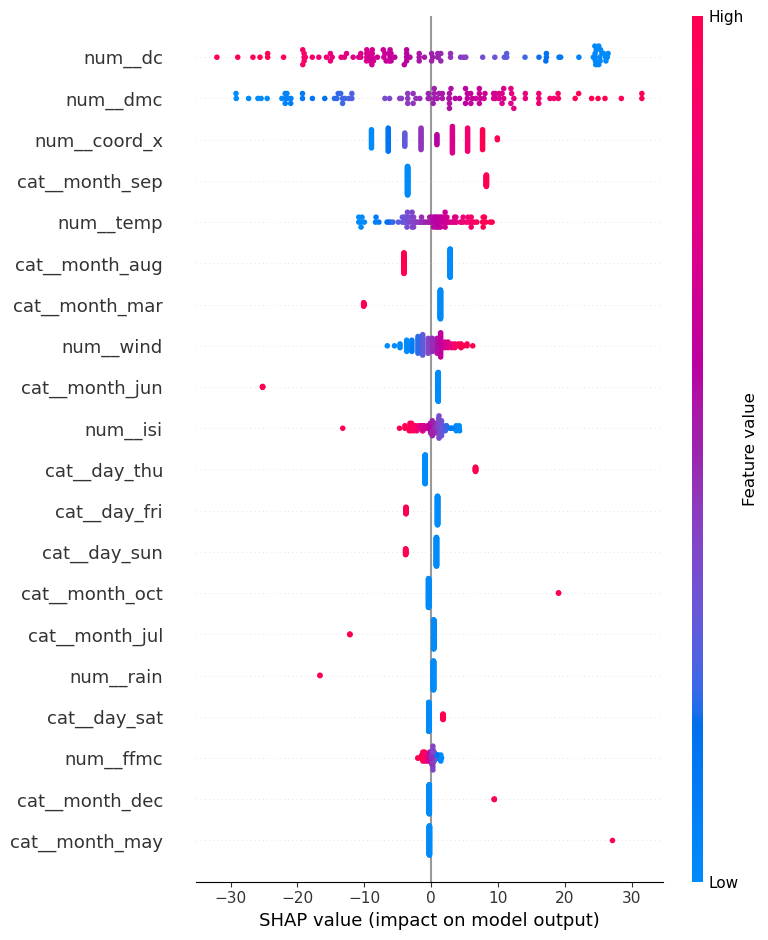

In [19]:
import shap


X_test_transformed = pipeline_b['preprocessing'].transform(X_test)

explainer = shap.Explainer(pipeline_b['regressor'], X_test_transformed)

shap_values = explainer(X_test_transformed)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_transformed, feature_names=pipeline_b['preprocessing'].get_feature_names_out())

*(Answer here.)*

Explanation: SHAP values provide insights into feature importance for individual predictions and across the entire dataset.
Impact of Feature Removal: Removing features with low SHAP values can potentially simplify the model, improve interpretability, and sometimes enhance performance.

Adjust the threshold and methods for feature selection based on your specific dataset characteristics and performance metrics. This approach leverages SHAP values to guide feature selection and model refinement, ensuring better model interpretability and potentially improved predictive performance.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.